In [ ]:
from Binaries import *

Hardware = HardwareClassifier()

vem_peak_scaled = np.array([180.23, 182.52, 169.56]) / 1.115                         # 11.5% surplus

In [ ]:
DownsamplingTest = EventGenerator(["19_19.5"], vem_peak = vem_peak_scaled, keep_scale = True, force_inject = 0, sigma = 0, apply_downsampling = True, split = 1)

In [ ]:
shit_traces = []

for i in range(DownsamplingTest.__len__()):

    traces, _ = DownsamplingTest.__getitem__(i, full_trace = True)
    print(f"Enumerating over showers... {i + 1}/{DownsamplingTest.__len__()}", end = " -- LAST: \r")

    for trace in traces:

        if not trace.SPDistance < 1000 or not trace.Zenith < 26:  
            print("rejected -- SP Distance / Zenith         ", end = "\r")
            continue

        for index in DownsamplingTest.__sliding_window__(trace):

            trace_section, _____, ________, ________ = trace.get_trace_window((index, index + 120), True, True)
            #              label, integral, metadata

            if Hardware(trace_section): 
                print("recjected -- triggered                    ", end = "\r")
                break

        else:
            print("accepted -- No trigger!!!")

            trace.__plot__()
            shit_traces.append(trace)

In [ ]:
from Binaries import *

FN_predictions = np.loadtxt("/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_vem_peak_scaled/false_negatives.csv")

print(len(FN_predictions))

# vvv dataset entry
# 0.013 2 5.849e+18 3591 38.546


In [ ]:
zenith = FN_predictions[:, -1] < 26
energy_low = 10**19 <= FN_predictions[:, 2]
energy_high = FN_predictions[:, 2] < 10**19.5
energy = [E_low and E_high for E_low, E_high in zip(energy_low, energy_high)]
filter = [Zenith and Energy for Zenith, Energy in zip (zenith, energy)]

print(len(FN_predictions[filter]))

plt.hist2d(FN_predictions[filter, 0], FN_predictions[filter, 1], bins = (100, 120))
plt.ylabel("Signal bins")
plt.xlabel("Deposited charge")

plt.ylim(0, 15)
plt.xlim(-0.1, 0.7)

In [ ]:
from Binaries import *

shower_files =  np.loadtxt("/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_scaled/false_negatives.csv", usecols = 0, dtype = str)
trace_fails = np.loadtxt("/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_scaled/false_negatives.csv", usecols = range(1, 129))

In [ ]:
traces = np.split(trace_fails, len(trace_fails) // 3)
showers = np.split(shower_files, len(shower_files) // 3)
print(len(traces))

In [ ]:
last_metadata = []
n_figures = 1

for shower, trace in zip(np.array(showers)[:, 0], traces):

    station, spd, e, t, n_muons, n_electrons, n_photons, int = new_metadata = trace[0, :8]

    if int < 10: continue

    pmt1, pmt2, pmt3 = trace[0, 8:], trace[1, 8:], trace[2, 8:]
    n_figures -= 1

    plt.figure()
    plt.title(f"{station = :.0f} {spd = :.0f}, {n_muons = :.0f}, {n_electrons = :.0f}, {n_photons = :.0f}, {int = :.1f}")
    plt.plot(range(120), pmt1)
    plt.plot(range(120), pmt2)
    plt.plot(range(120), pmt3)

    plt.legend(title = shower)

    new_metadata = last_metadata

    if n_figures == 0: break

In [ ]:
from Binaries import *

/cr/tempdata01/filip/QGSJET-II/protons/19_19.5/DAT964624_01.csv


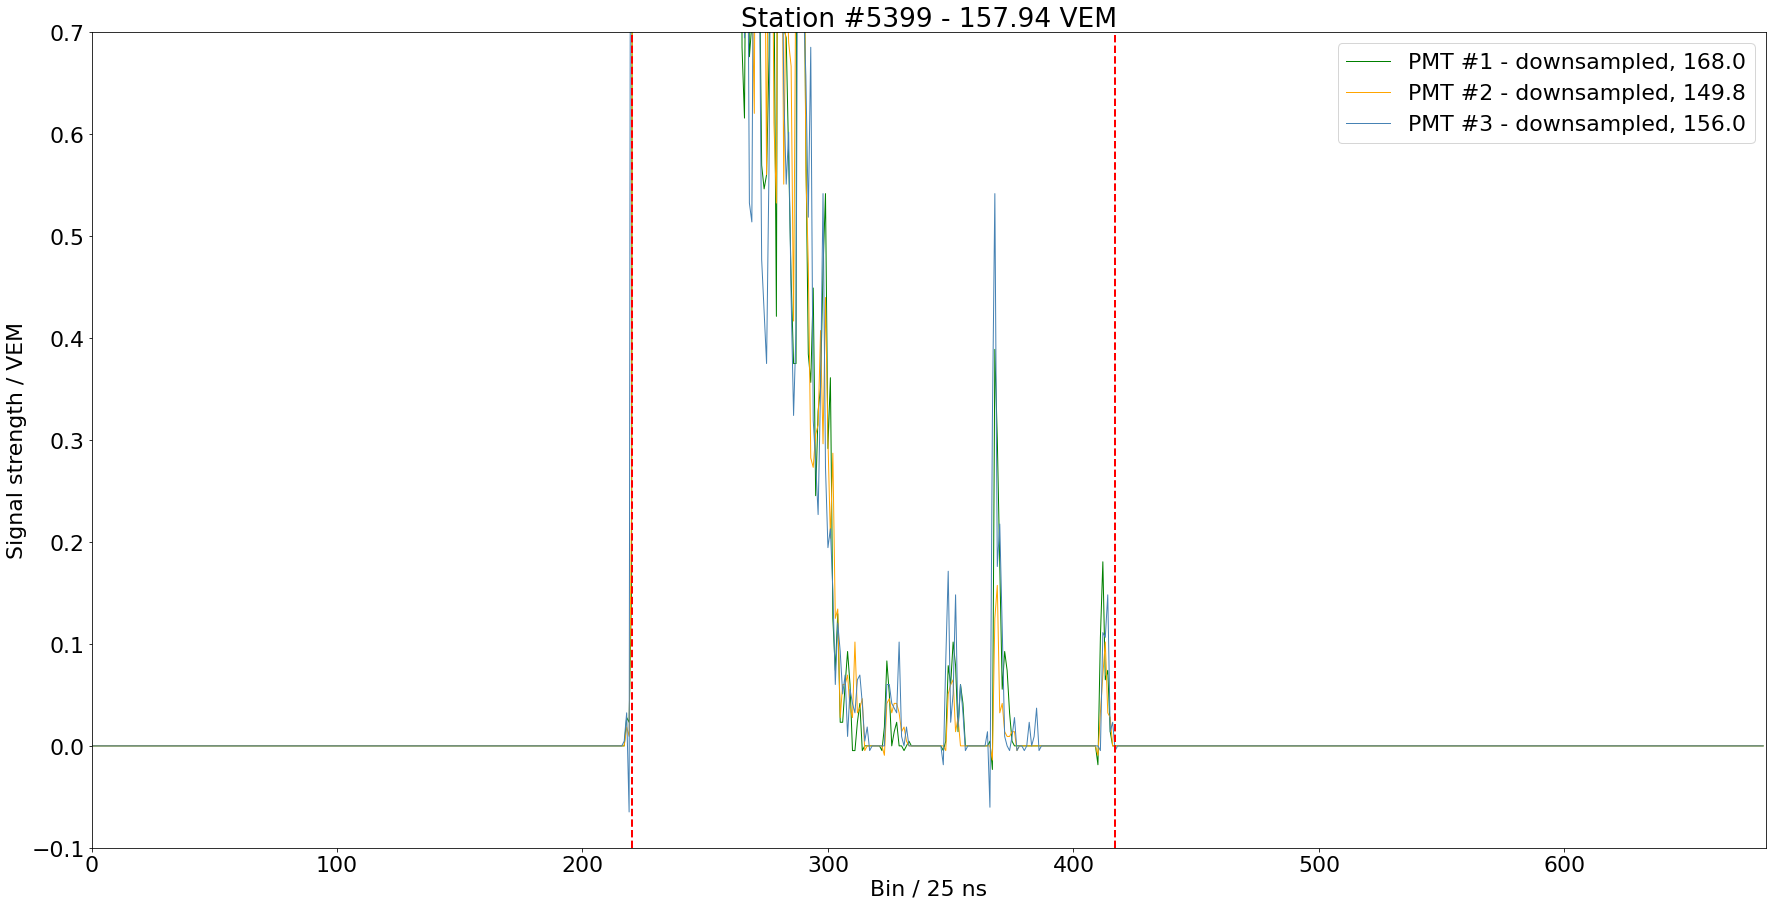

AttributeError: 'Trace' object has no attribute 'integral_trace'

In [1]:
from Binaries import *

TestEvents = EventGenerator(["19_19.5"], real_background = False, apply_downsampling = True, split = 1, seed = 1, force_inject = 0)

for index in range(TestEvents.__len__()):

    if TestEvents.files[index] == "/cr/tempdata01/filip/QGSJET-II/protons/19_19.5/DAT964624_01.csv": break
else: print("Index not found??")

print(TestEvents.files[index])

Traces = TestEvents.__getitem__(index)

for trace in Traces:

    if trace.StationID != 5399: continue

    plt.ylim(-0.1, 0.7)
    trace.__plot__()

    plt.plot(range(trace.trace_length), trace.integral_trace, lw = 4)

/cr/tempdata01/filip/QGSJET-II/protons/19_19.5/DAT964624_01.csv


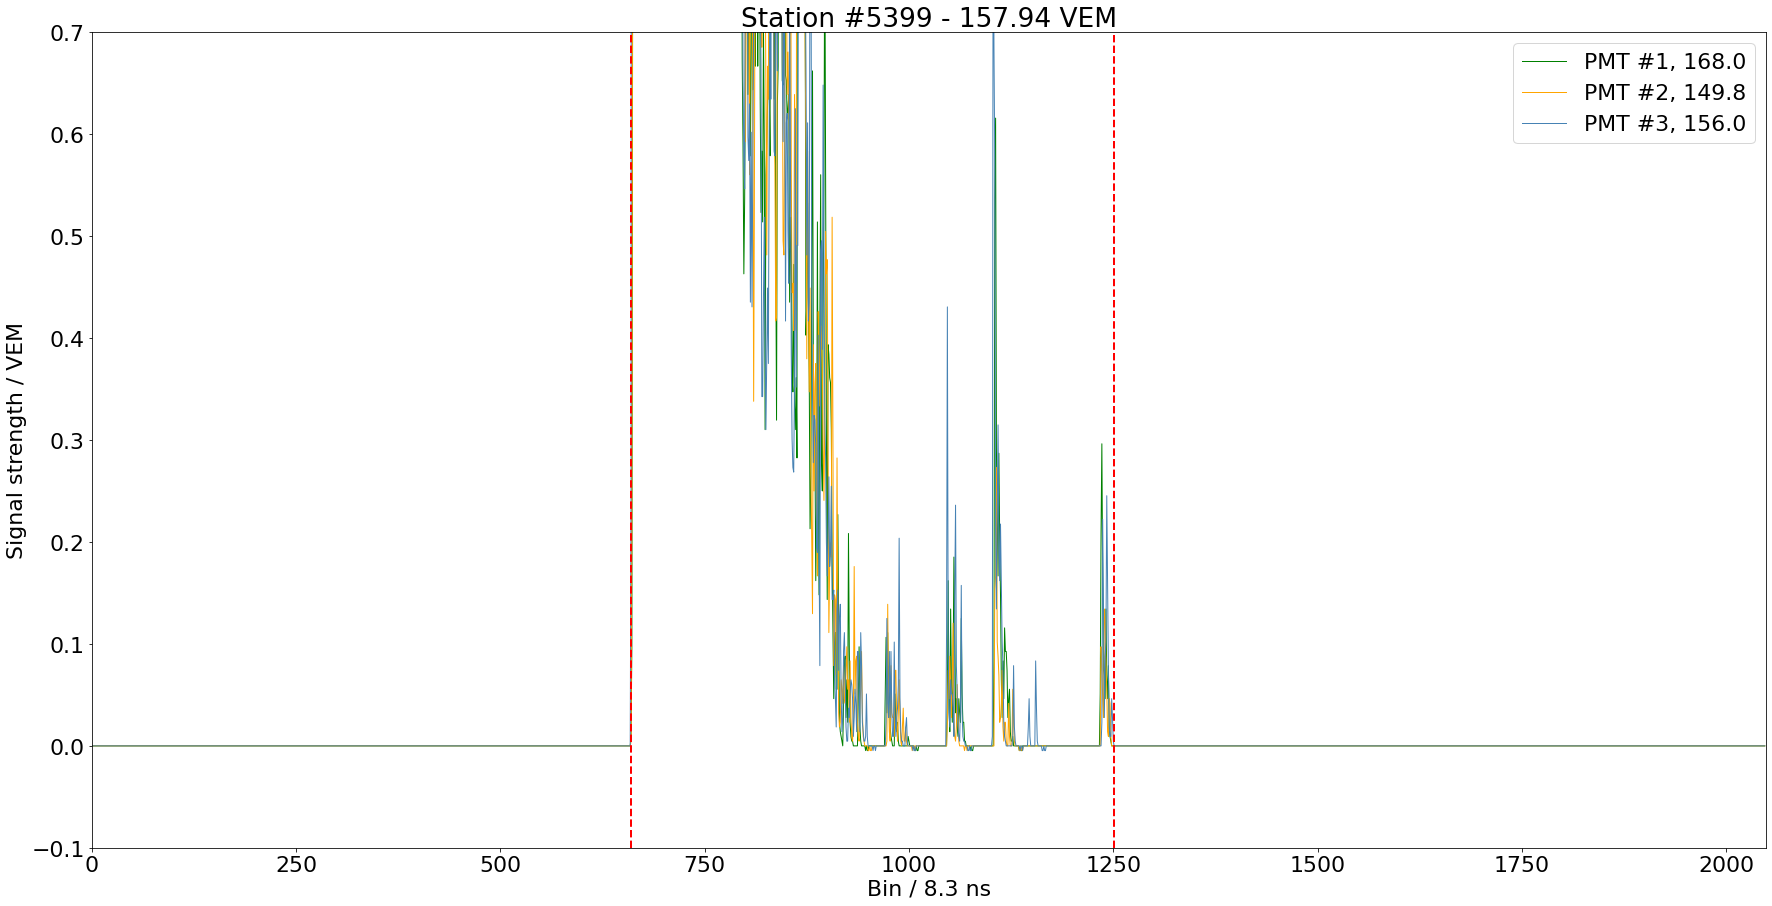

AttributeError: 'Trace' object has no attribute 'integral_trace'

In [2]:
from Binaries import *

TestEvents = EventGenerator(["19_19.5"], real_background = False, apply_downsampling = False, split = 1, seed = 0, force_inject = 0)

for index in range(TestEvents.__len__()):

    if TestEvents.files[index] == "/cr/tempdata01/filip/QGSJET-II/protons/19_19.5/DAT964624_01.csv": break
else: print("Index not found??")

print(TestEvents.files[index])

Traces = TestEvents.__getitem__(index)

for trace in Traces:

    if trace.StationID != 5399: continue

    plt.ylim(-0.1, 0.7)
    trace.__plot__()

    plt.plot(range(trace.trace_length), trace.integral_trace, lw = 4)


DATASET                                                                     TP      FP      TN      FN
HardwareClassifier random_traces_downsampled_scaled                       8168       0       0   87665 -> ACC = 8.52%


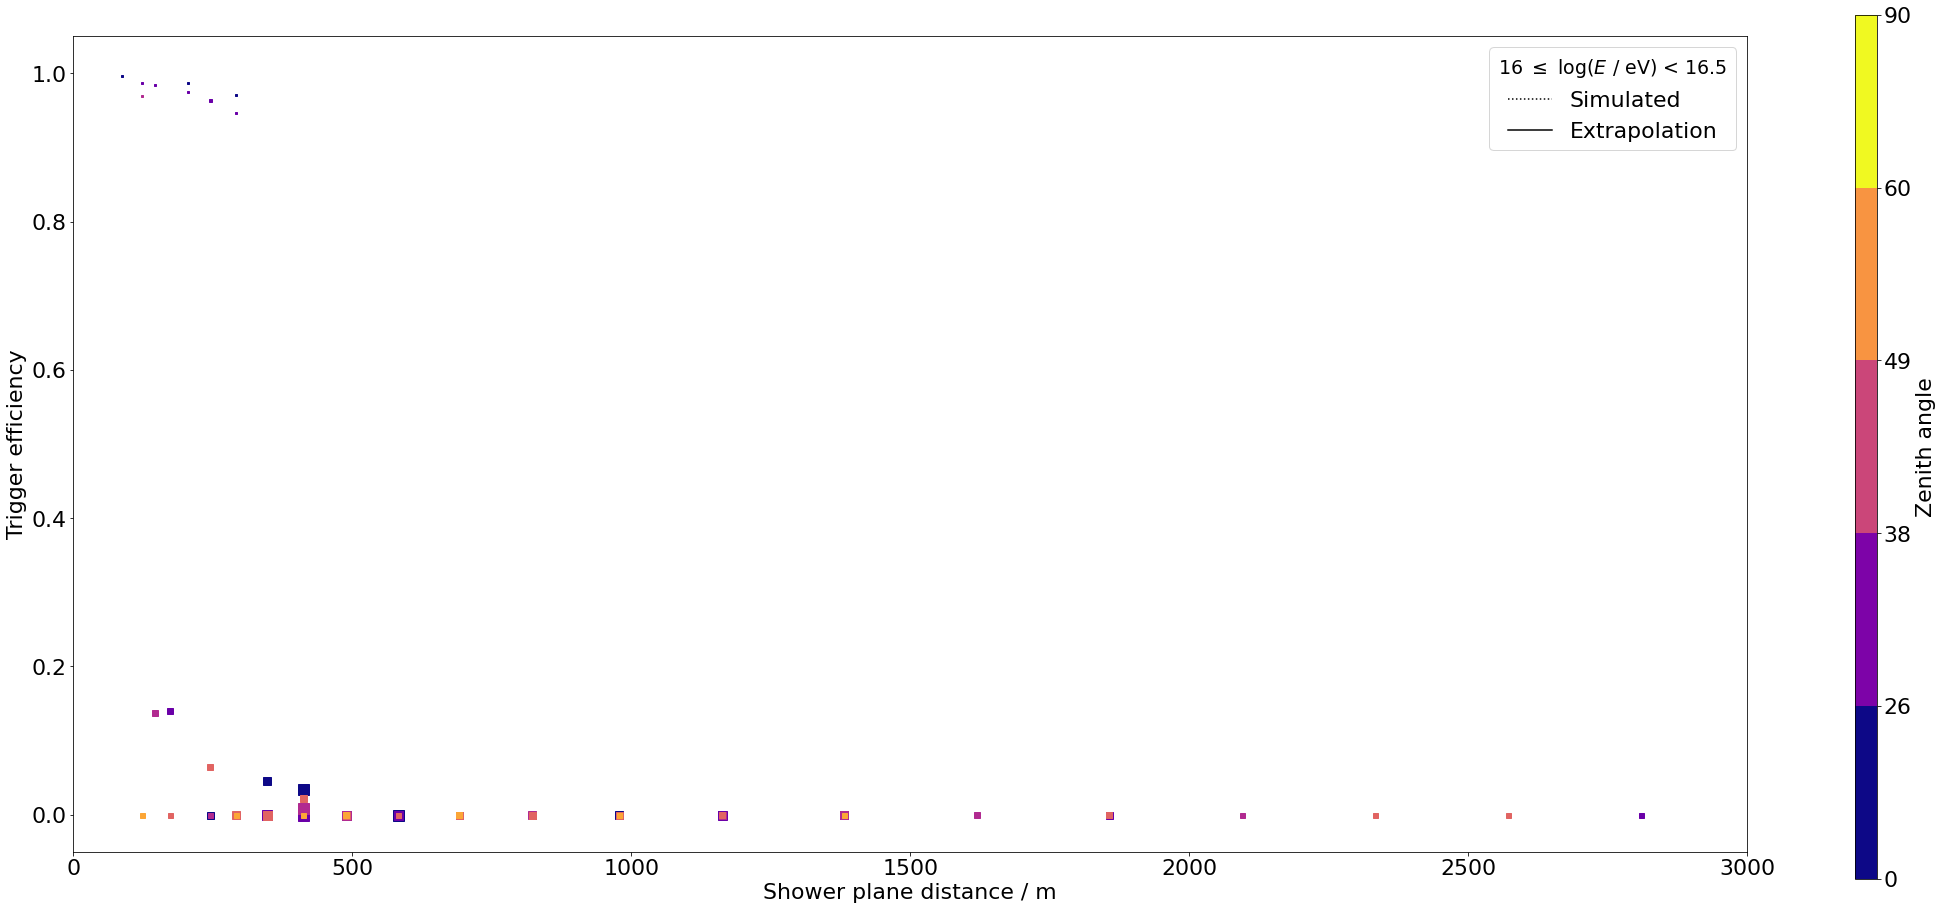

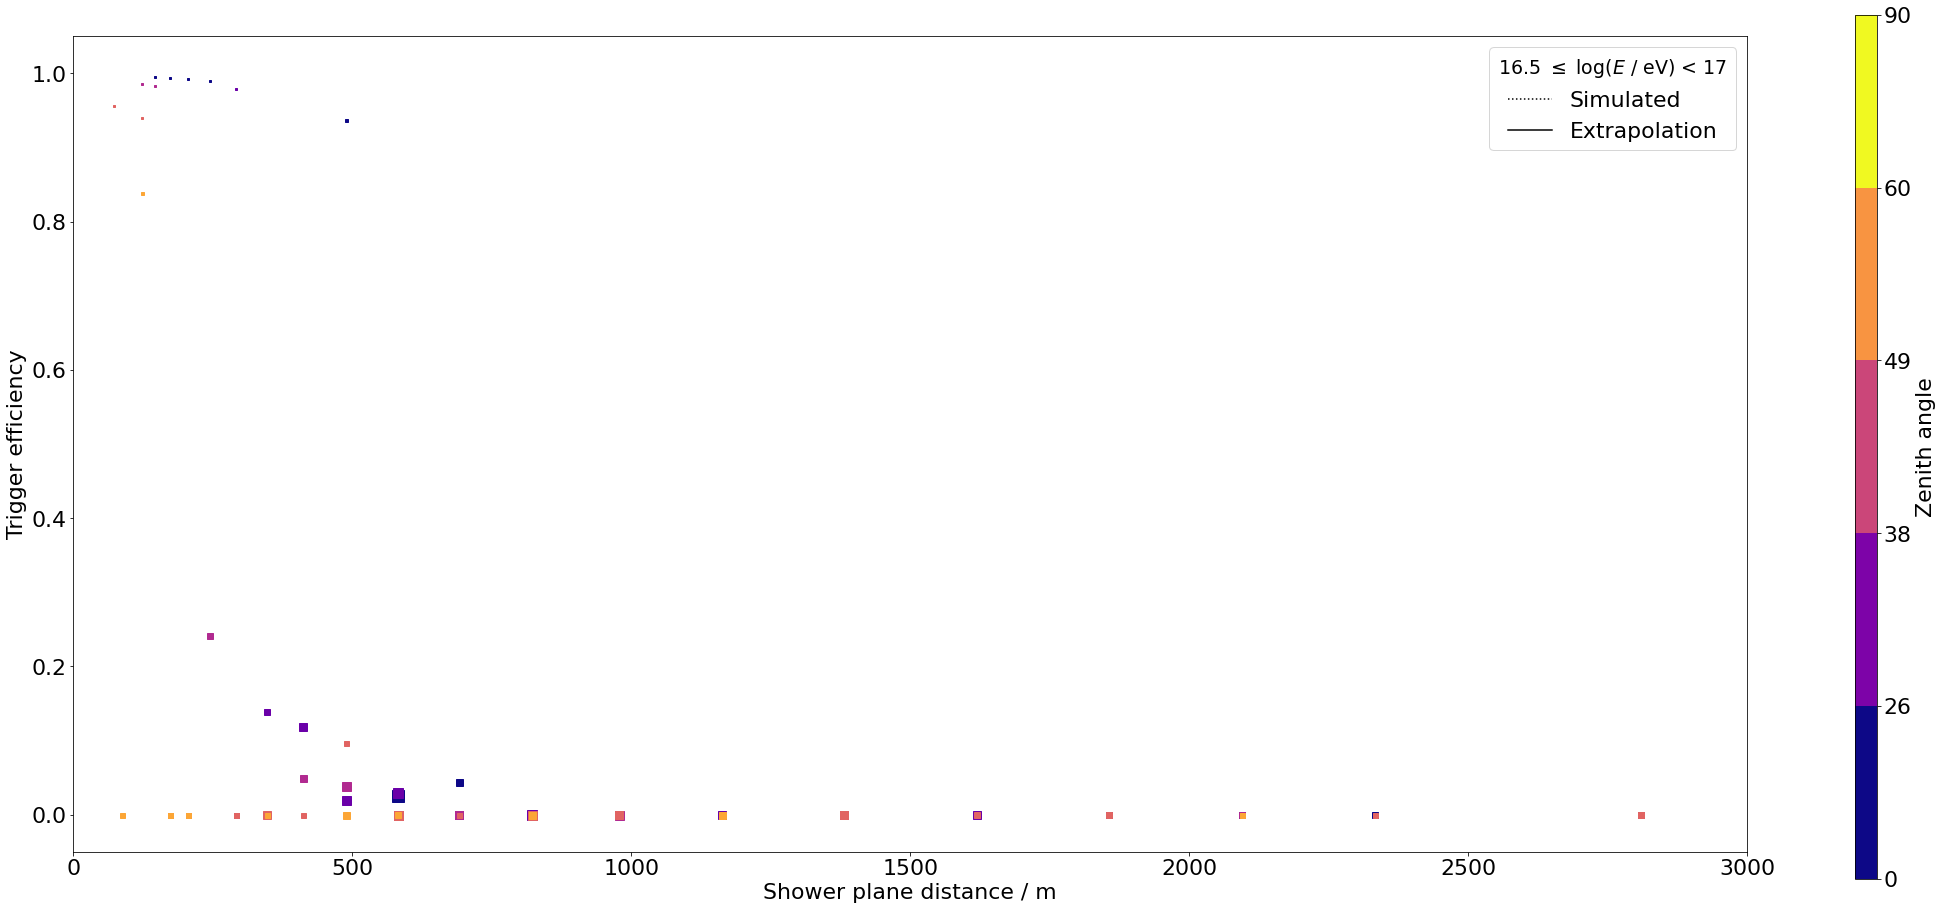

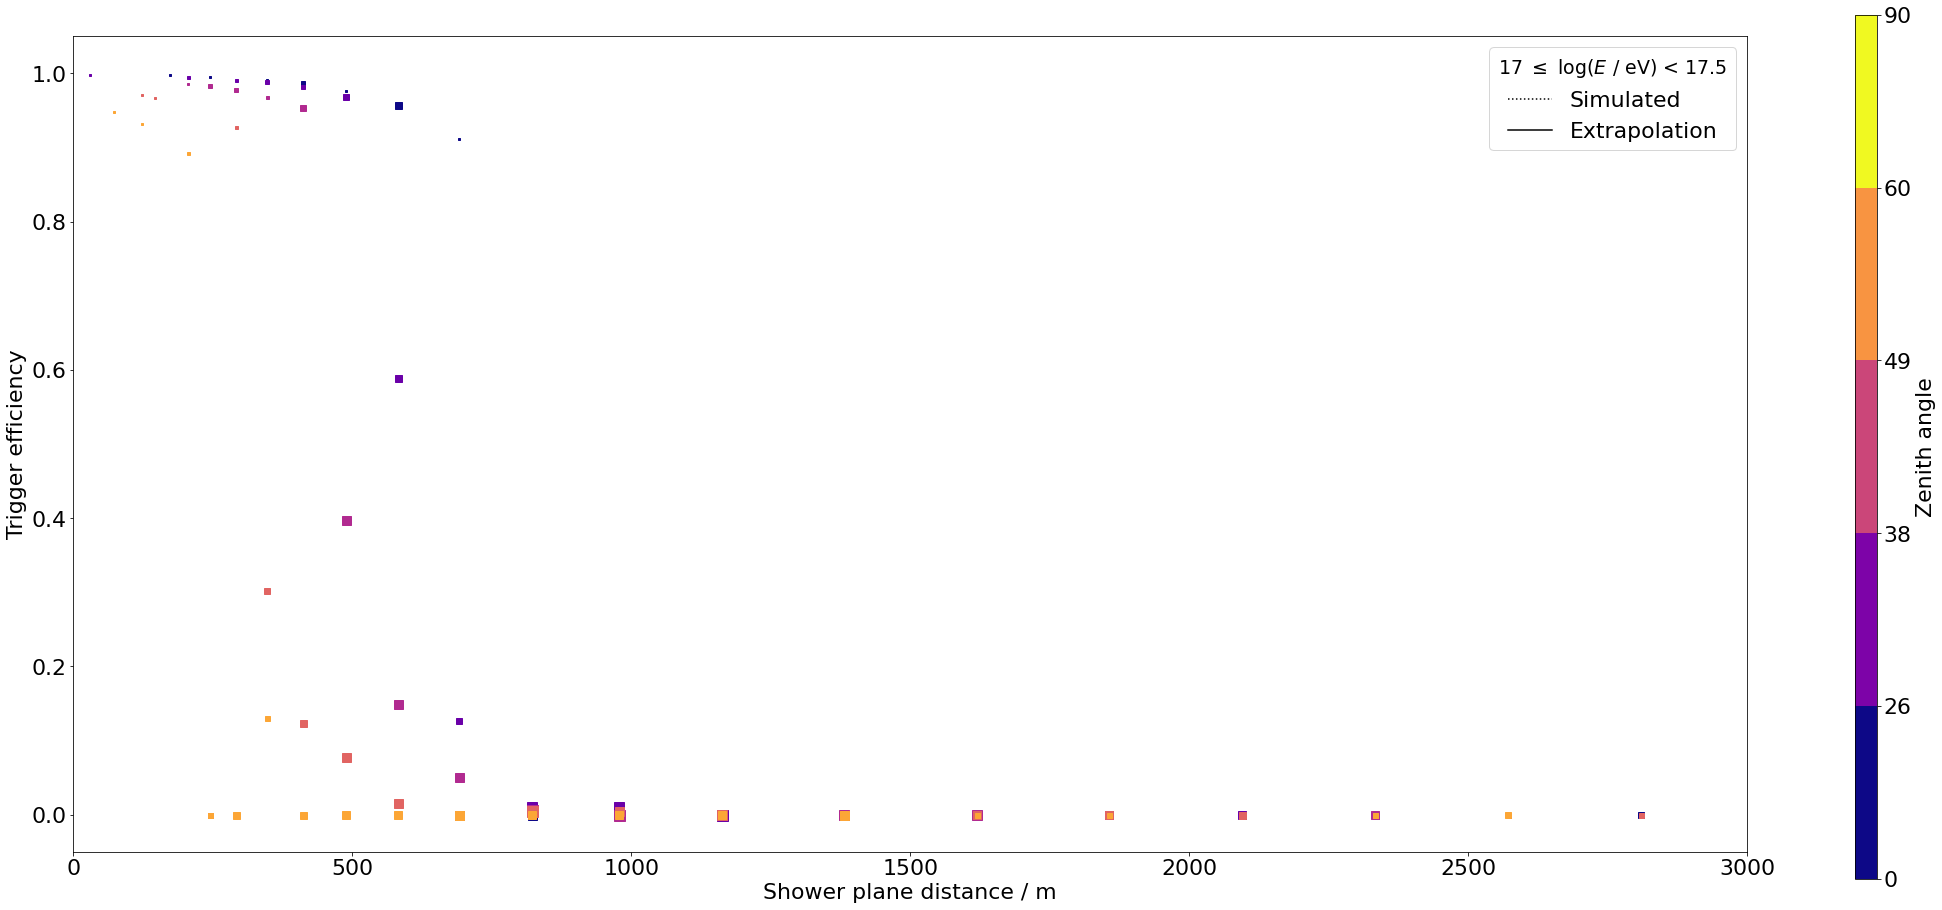

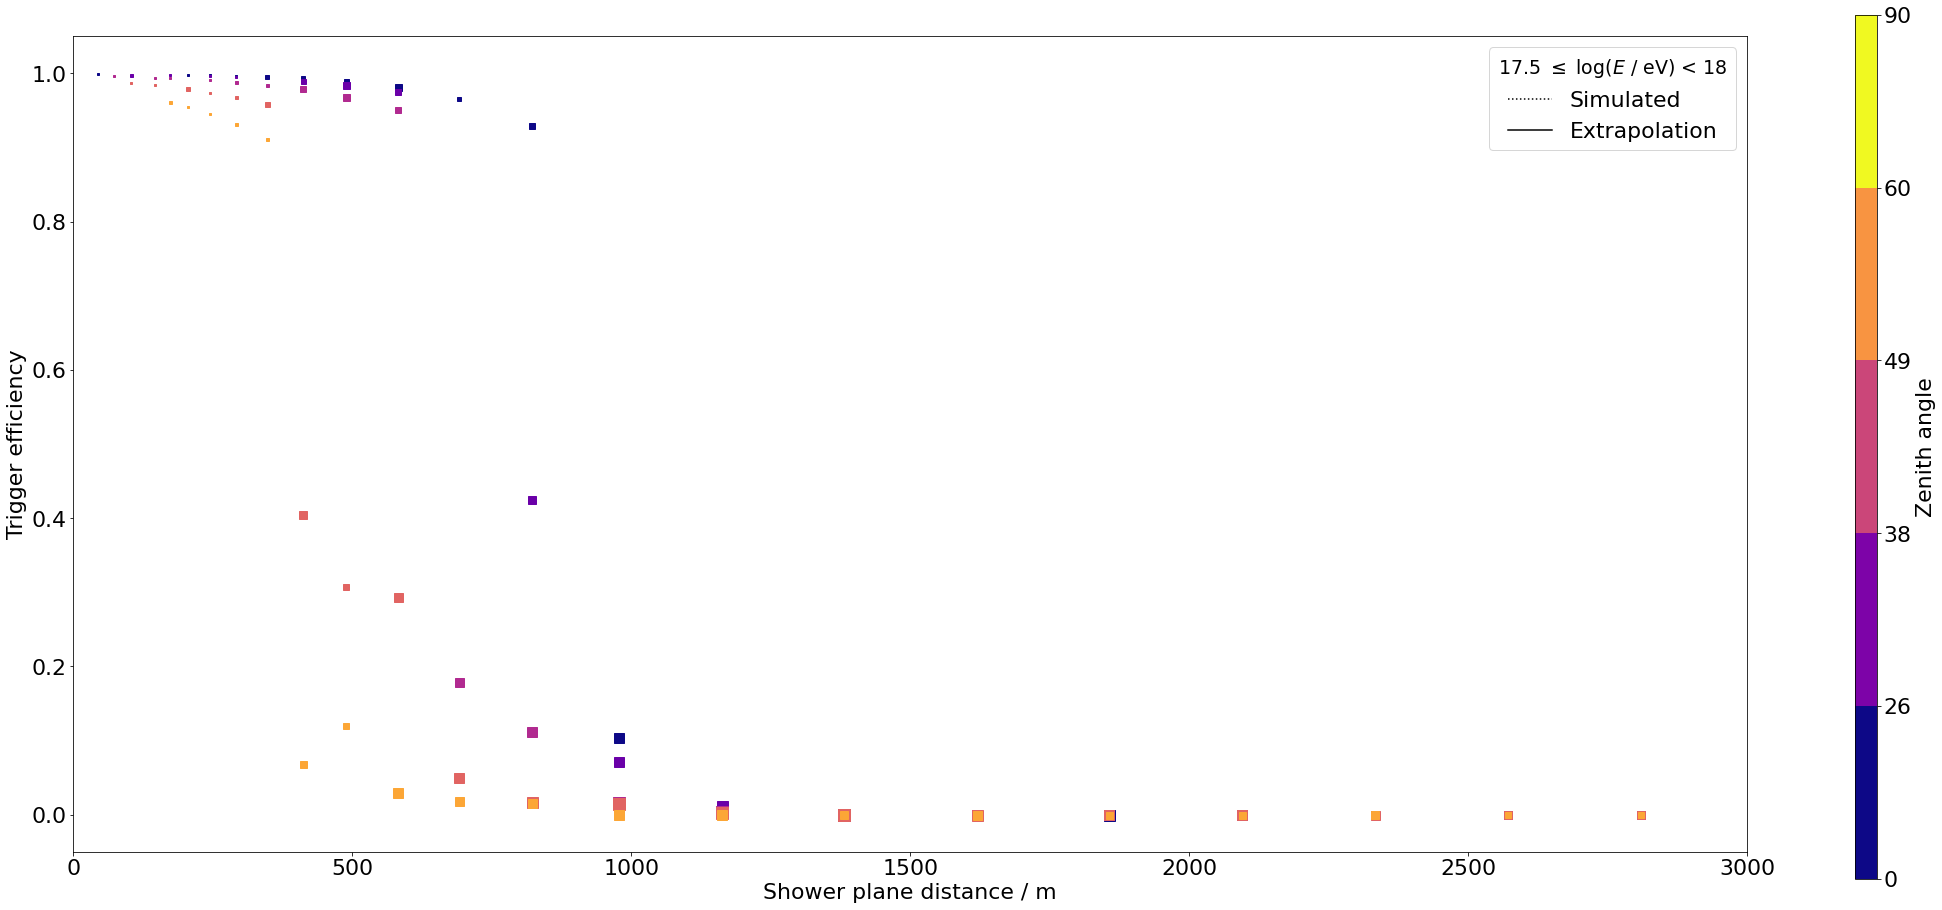

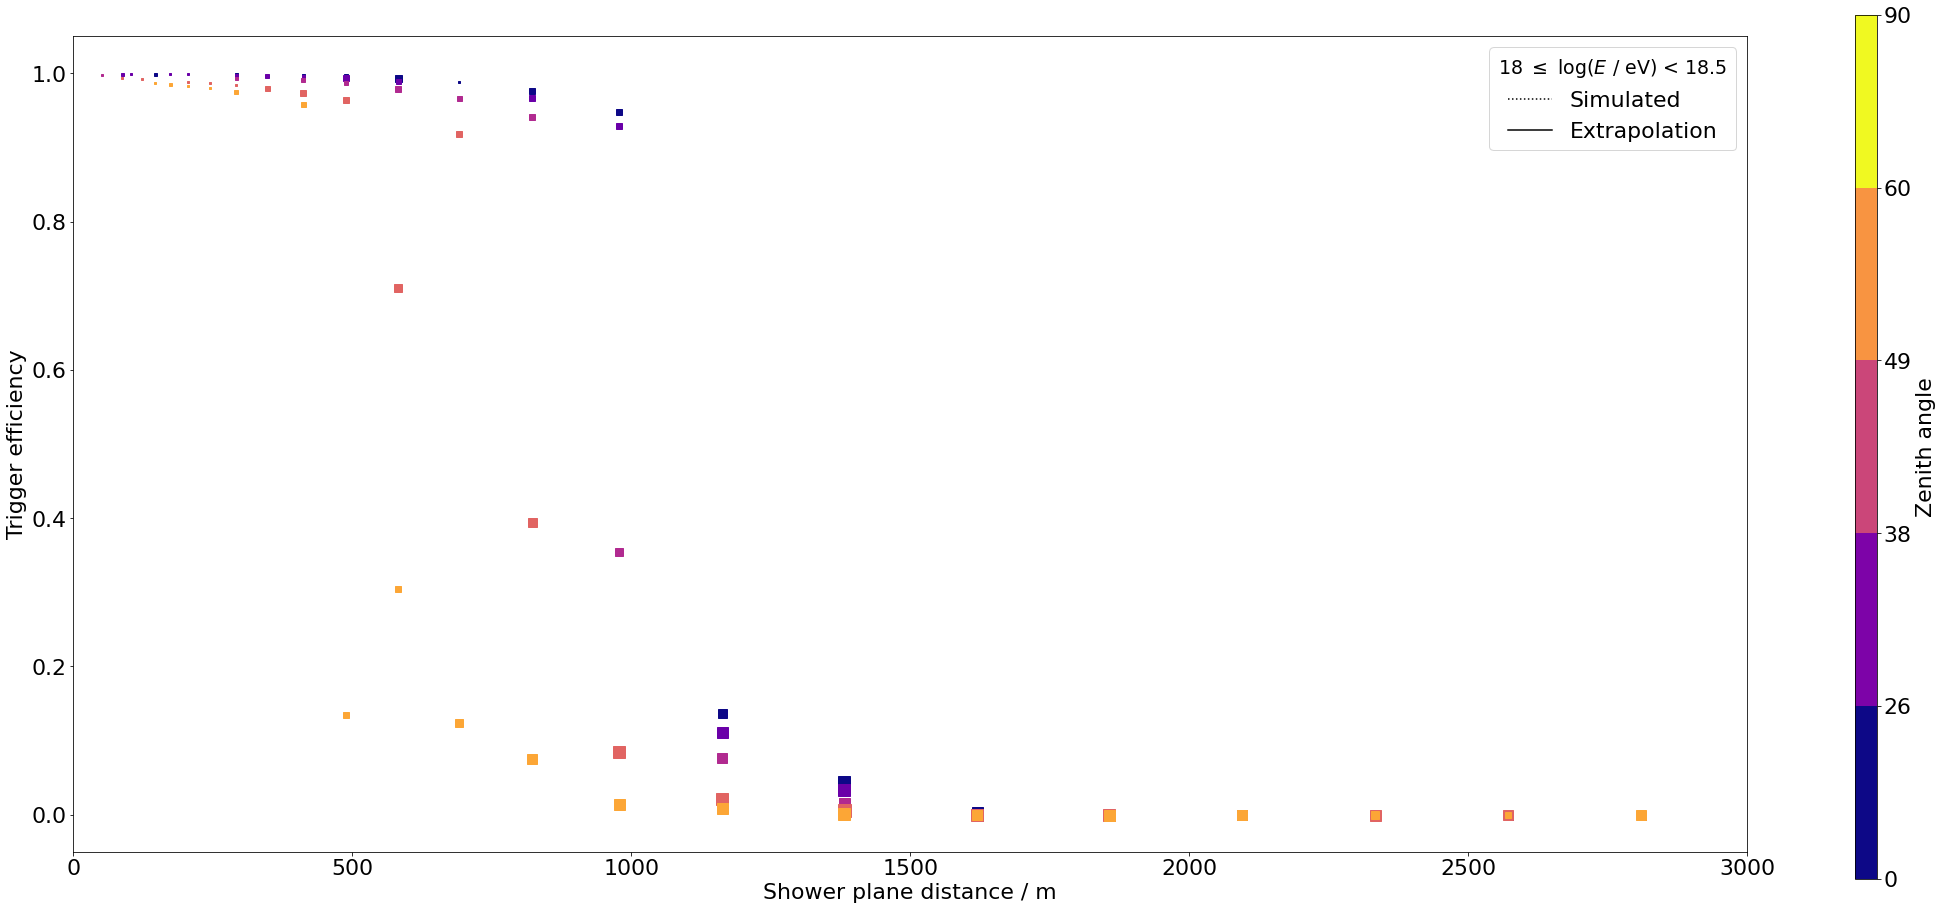

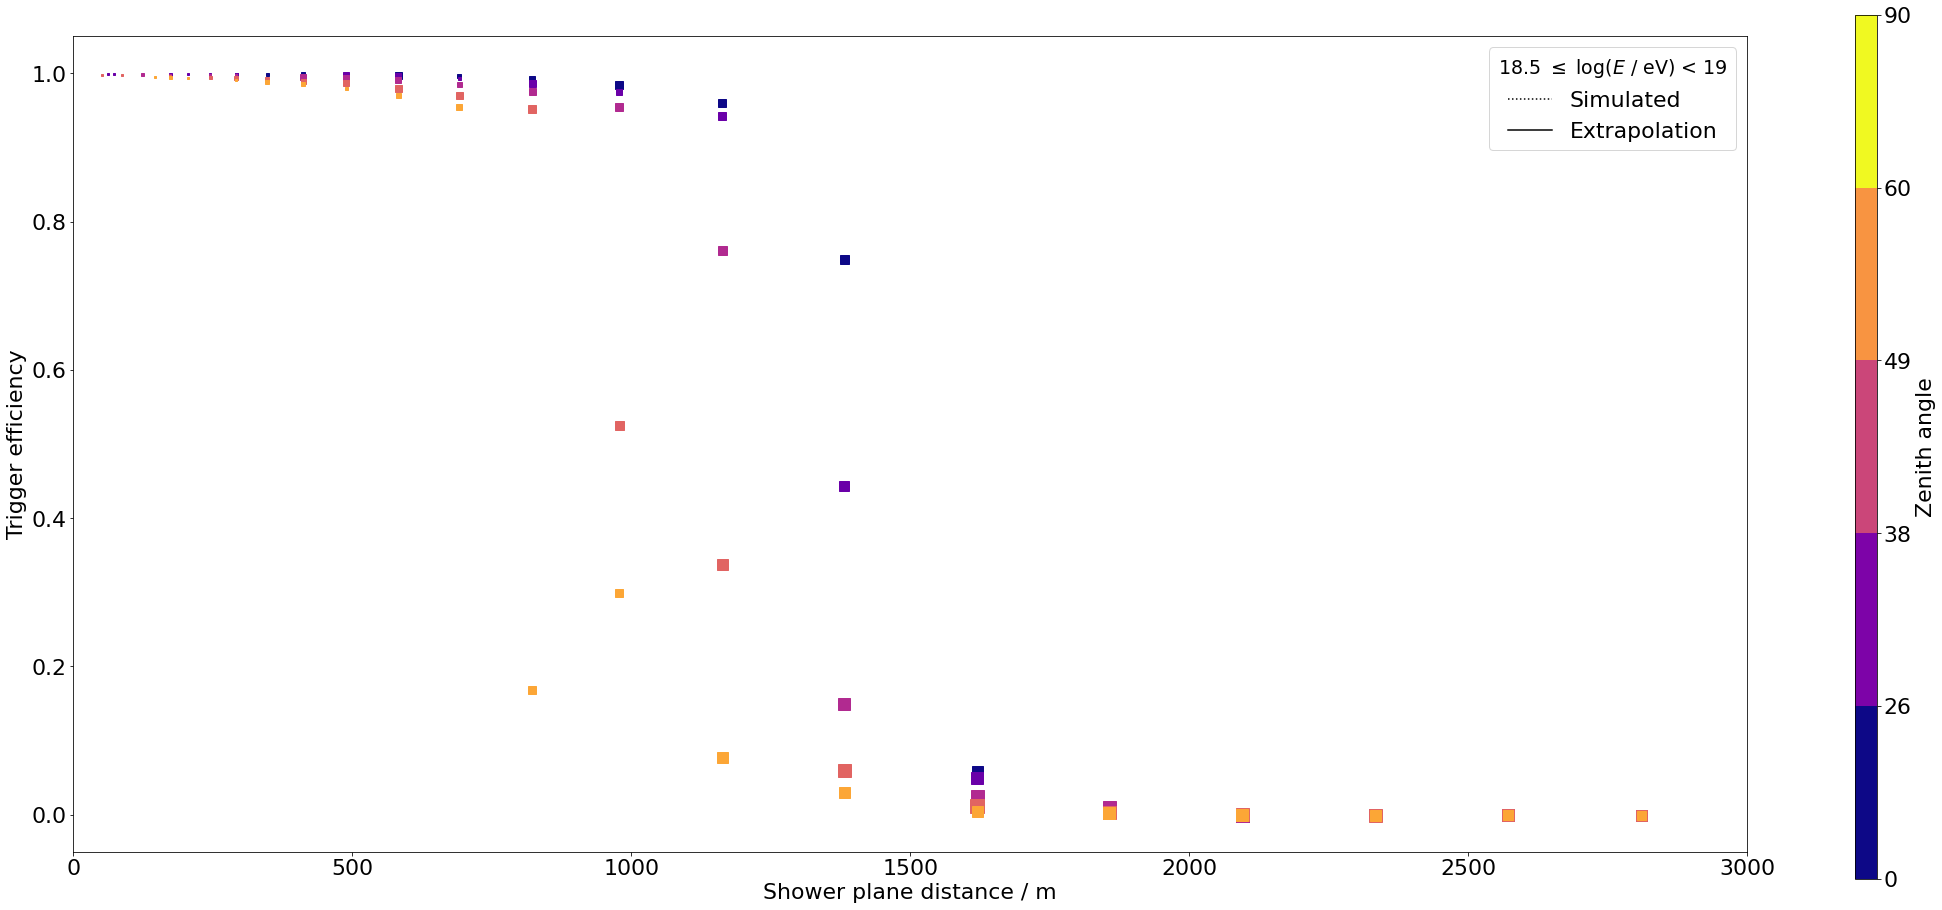

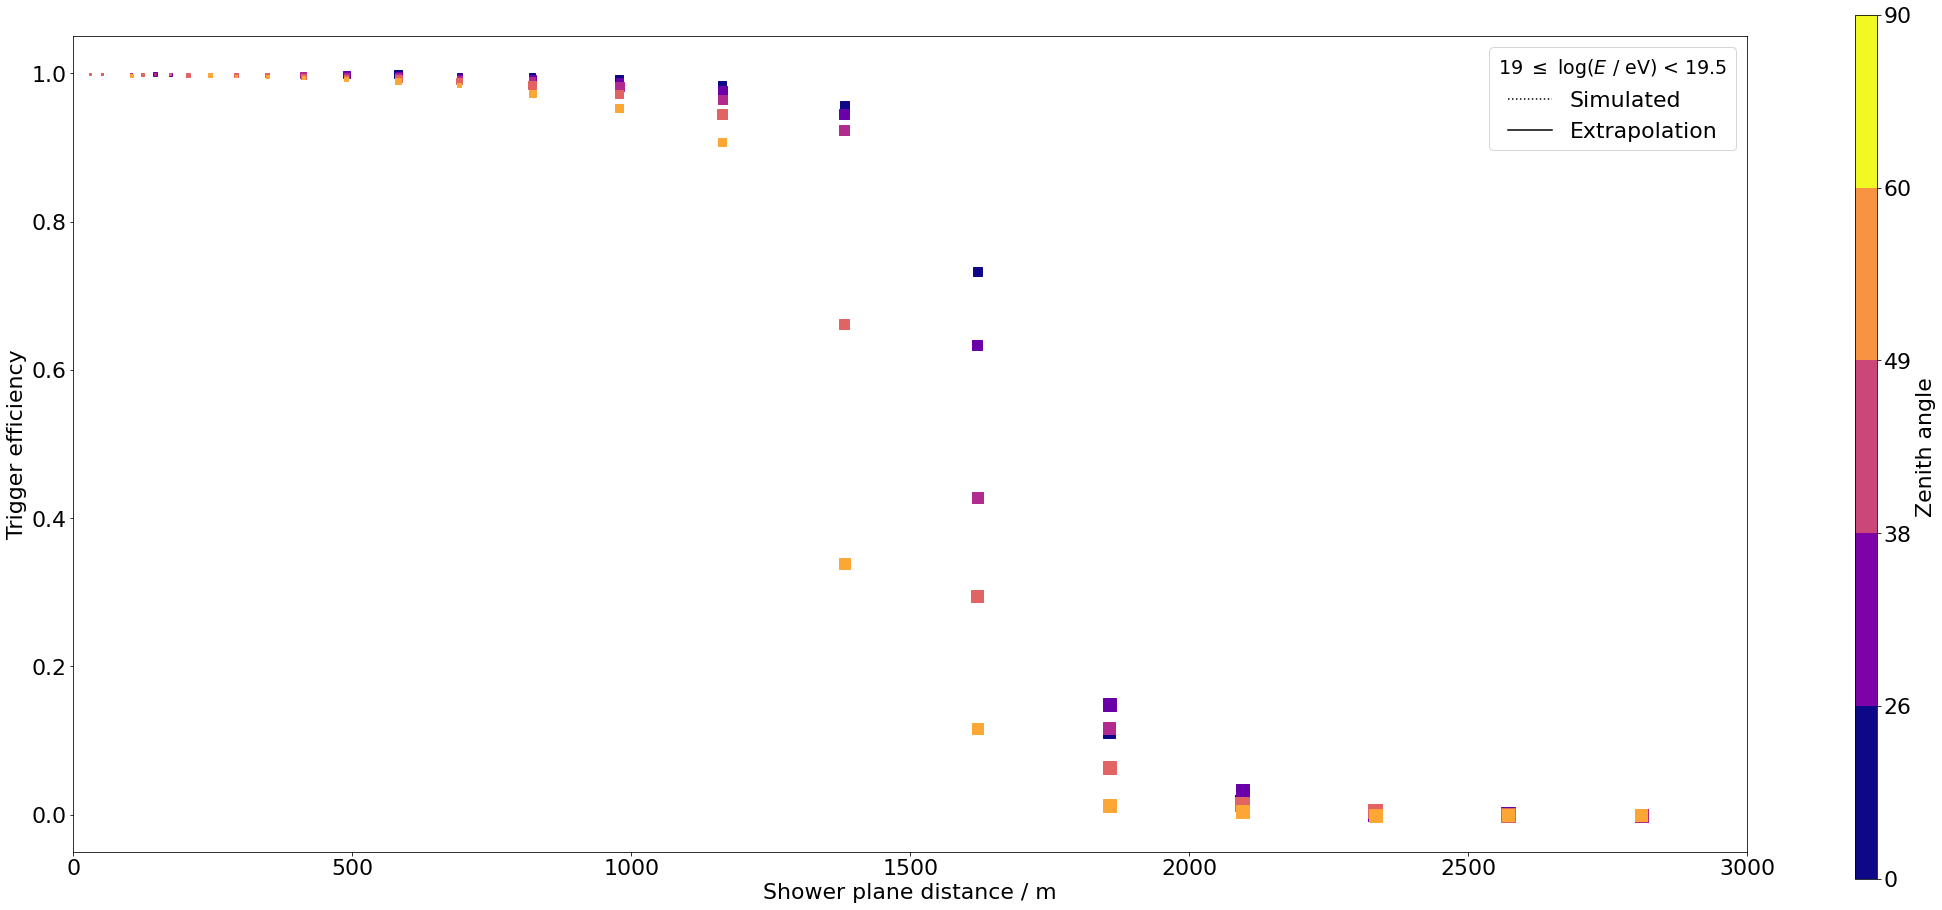

(array([], shape=(7, 0), dtype=float64),
 array([], shape=(7, 0), dtype=float64))

In [3]:
TestClassifier = HardwareClassifier()
TestClassifier.spd_energy_efficiency("random_traces_downsampled_scaled")


In [10]:
file_str = "/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_scaled/true_positives.csv"

with open(file_str, "r") as file:
    line = file.readline()

line_corrected = line.split("p")[1:]
line_corrected = ["p" + s for s in line_corrected]

with open(file_str, "w") as file:
    for line in line_corrected:
        file.write(line + "\n")

In [9]:
print(line_corrected[0])

protons/16_16.5/DAT031221_02.csv 5398 358 1.34048e+16 48.0998 1 0 9  0.5131343085997614 
